# Clustering

This section tries to cluster the different politicians based on their written words recieved from the data cleaning. The hypothesis is that the candidates will cluster together with their colleagues from their own party, but a fun tendency could be the exact opposite. 

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize

df_politicians = pd.read_csv("Data/Giant.csv")
df_politicians["Tweets"] = [[w for w in word_tokenize(df_politicians["Tweets"][i]) if w.isalnum()] for i in range(len(df_politicians))]

In [ ]:
df_politicians.head()

,Party,Person,Tweets
0,socialdemokratiet,magnus_heunicke,"['promises made promises kept', 'covidsmitten ..."
1,socialdemokratiet,nicolai_wammen,['vej spændende aften gode kollegaer god valga...
2,socialdemokratiet,mattias_tesfaye,"['nytår ps vandt', 'liekaas fremragende filmen..."
3,venstre,jakob_ellemann,['fesagen skadet danmarks efterretningstjenest...
4,venstre,soren_gade,"['snothvalpen ved grimmebriller', 'sagt lige s..."


In [ ]:
wnl = nltk.WordNetLemmatizer() 
STOPWORDS = nltk.corpus.stopwords.words('danish') + ["http"]

def clean_tweet(tweet):
    tokensraw = word_tokenize(tweet) #get tokens 
    tokens = [word.lower() for word in tokensraw if word.isalnum()] #only get words and numbers
    tokens = [wnl.lemmatize(t) for t in tokens] #lemmatize tokens
    tokens = [w for w in tokens if w.lower() not in STOPWORDS] #remove stopwords
    return tokens

In [ ]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia('da')


df_topic = pd.DataFrame({"topic" : ["climate_and_energy", "job_market_and_economy", "law_and_sentencing", "EU_and_international_politics", "welfare", "education", "democracy", "healthcare"]})
df_topic["wikipages"] = [
    ["klima", "energi"], # clima and energyy
    ["arbejdsmarked", "økonomi"], # arbejdsmarked and økonomi
    ["strafferet", "straf"], # ret og straf
    ["Den_Europæiske_Union", "udenrigspolitik"], # EU og udenrigs
    ["velfærd"], # velfærd
    ["uddannelse", "Statens_Uddannelsesstøtte"], # uddannelse
    ["demokrati"], # demokrati
    ["sundhed"], # sundhed
]

texts = []
for i in range(len(df_topic)):
    t = [clean_tweet(wiki_wiki.page(m).text) for m in df_topic.loc[i, "wikipages"]] 
    t = [word for words in t for word in words]
    texts += [t]
df_topic["text"] = texts

In [ ]:
df_topic

,topic,wikipages,text
0,climate_and_energy,"[klima, energi]","[ved, klimaet, vejrliget, forstås, oversigtlig..."
1,job_market_and_economy,"[arbejdsmarked, økonomi]","[arbejdsmarked, marked, arbejdskraft, købes, s..."
2,law_and_sentencing,"[strafferet, straf]","[strafferet, betegner, juridiske, disciplin, o..."
3,EU_and_international_politics,"[Den_Europæiske_Union, udenrigspolitik]","[europæiske, union, eu, økonomisk, politisk, u..."
4,welfare,[velfærd],"[ordet, velfærd, betyder, individet, mest, øns..."
5,education,"[uddannelse, Statens_Uddannelsesstøtte]","[uddannelse, udtryk, både, benyttes, uformelle..."
6,democracy,[demokrati],"[demokrati, oldgræsk, δημοκρατία, romaniseret,..."
7,healthcare,[sundhed],"[få, ingen, kildehenvisninger, artikel, hvilke..."


In [ ]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [ ]:
df_similarity = pd.DataFrame(columns=df_topic.topic)
for i in range(len(df_politicians)):
    for j in range(len(df_topic)):
        df_similarity.loc[df_politicians.Person[i],df_topic.topic[j]] = jaccard_similarity(df_politicians.Tweets[i], df_topic.text[j])

df_similarity.fillna(0, inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_politicians.Party)
X = df_similarity.drop(['rosa_eriksen', 'henrik_frandsen'])
labels = le.transform(df_politicians["Party"])

## Kmeans Clustering

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(df)
label = kmeans.labels_

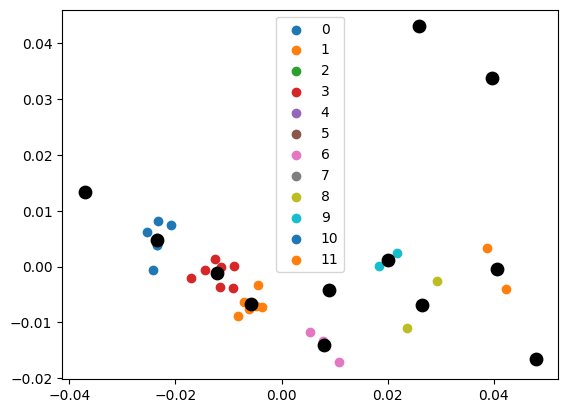

In [ ]:
import matplotlib.pyplot as plt
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=12, linkage='ward').fit(df)
labels = clustering.labels_

#centroids = clustering.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
#plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()


In [ ]:
df_pol_new['Person'].values

array(['magnus_heunicke', 'nicolai_wammen', 'mattias_tesfaye',
       'jakob_ellemann', 'soren_gade', 'sophie_lohde', 'lars_lokke',
       'jacob_mark', 'pia_dyhr', 'kirsten_andersen', 'dennis_flydtkjær',
       'peter_skaarup', 'soren_espersen', 'alex_vanopslagh', 'ole_olesen',
       'solbjorg_jakobsen', 'soren_pape', 'mette_abildgaard',
       'rasmus_jarlov', 'pelle_dragsted', 'mai_villadsen', 'rosa_lund',
       'martin_lidegaard', 'samira_nawa', 'katrine_robsoe',
       'pernille_vermund', 'lars_mathiesen', 'kim_andersen',
       'franciska_rosenkilde', 'christina_olumeko', 'torsten_gejl',
       'morten_messerschmidt', 'pia_kjarsgaard', 'peter_kofod'],
      dtype=object)

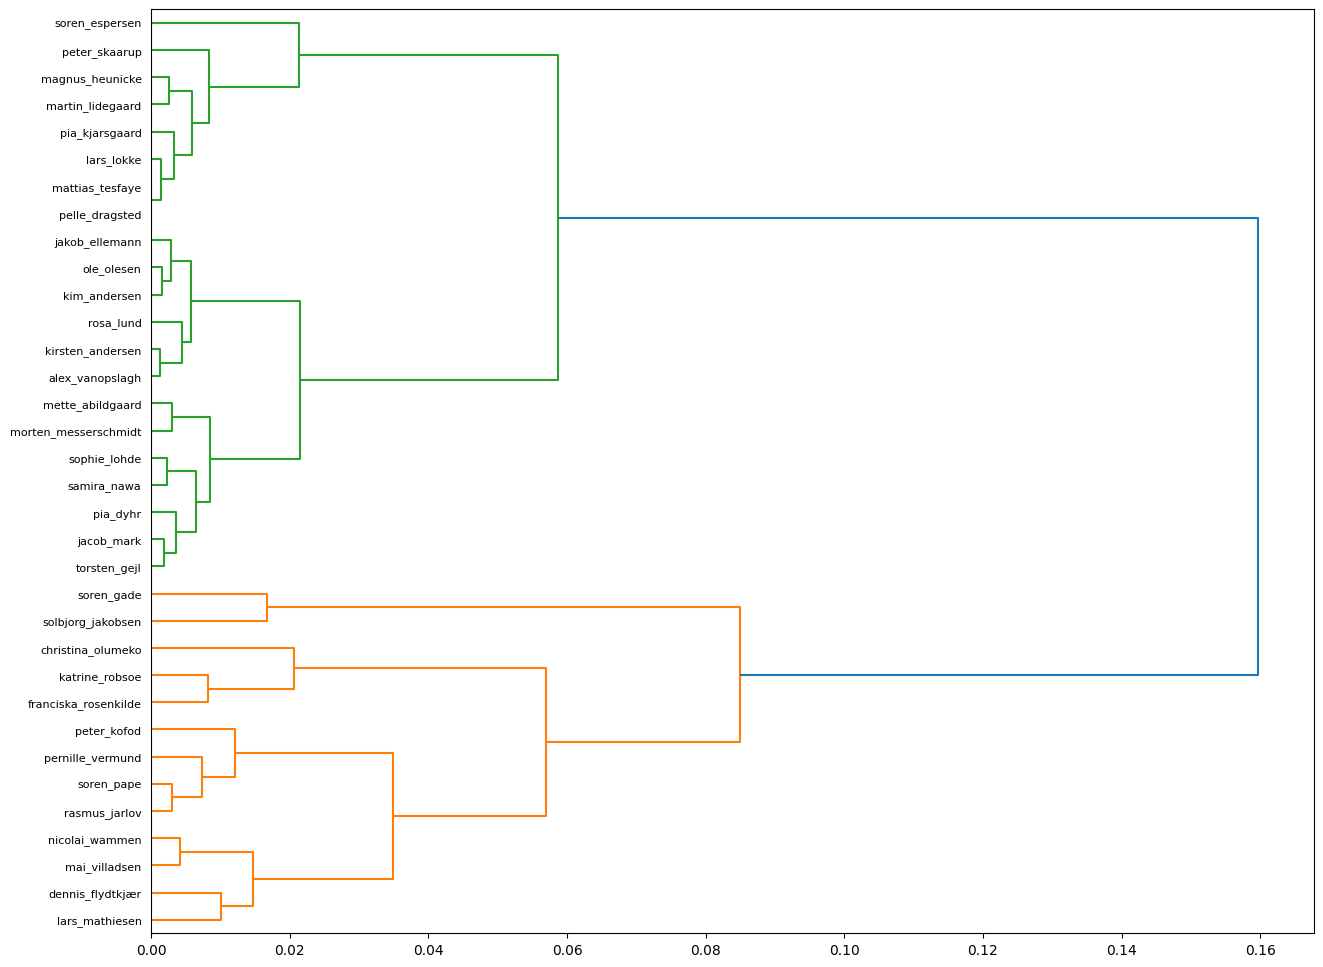

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
"""
dendo_data = df

linkage_data = linkage(dendo_data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show() 
"""

dendo_data = df
linked = linkage(dendo_data, 'ward')

labelList = df_pol_new['Person'].values

plt.figure(figsize=(15, 12))
dendrogram(
            linked,
            orientation='right',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

In [ ]:
HCA(df,12)

array([ 3,  4,  3,  6,  9,  1,  3,  1,  1,  6,  0,  3,  7,  6,  6, 10,  5,
        1,  5,  3,  4,  6,  3,  1,  2,  5,  0,  6,  2,  8,  1,  1,  3, 11])

In [ ]:
df_pol_new = df_politicians.copy()
df_pol_new.drop([7,8], inplace=True)
df_pol_new["HCA"] = HCA(df, 12)
df_pol_new["Kmeans"] = kmeans.labels_

df_pol_new

,Party,Person,Tweets,HCA,Kmeans
0,socialdemokratiet,magnus_heunicke,"[made, promises, kept, falder, blandt, ældre, ...",3,0
1,socialdemokratiet,nicolai_wammen,"[spændende, aften, gode, kollegaer, god, valga...",4,9
2,socialdemokratiet,mattias_tesfaye,"[ps, vandt, fremragende, filmen, fremragende, ...",3,0
3,venstre,jakob_ellemann,"[skadet, danmarks, efterretningstjeneste, lad,...",6,11
4,venstre,soren_gade,"[ved, grimmebriller, lige, smidt, bleen, dkpol...",9,4
5,venstre,sophie_lohde,"[store, indsats, igennem, år, ønskes, bedste, ...",1,3
6,moderaterne,lars_lokke,"[kæmpe, tillykke, bor, ingen, sygeplejersker, ...",3,0
9,sf,jacob_mark,"[morten, kommer, virkelig, savne, tak, skrive,...",1,3
10,sf,pia_dyhr,"[gjort, stop, spind, pelle, ved, børn, unges, ...",1,3
11,sf,kirsten_andersen,"[samarbejdet, gensyn, derude, indsatsen, held,...",6,11


## With TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=STOPWORDS)
X = vectorizer.fit_transform(df_pol_new.Tweets.apply(lambda x: " ".join(x)))
X

<34x72035 sparse matrix of type '<class 'numpy.float64'>'
	with 250517 stored elements in Compressed Sparse Row format>

In [ ]:
clust = KMeans(n_clusters=12, random_state=0).fit(X)
clust.labels_

array([10,  1, 11,  9,  4,  0,  6, 11, 11, 11, 11,  1,  6,  0,  9,  5,  1,
        0,  9,  9, 11, 11,  1,  1, 11,  8, 11,  2,  7,  3, 11,  1,  1,  1],
      dtype=int32)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(X)

array([[1.        , 0.3246915 , 0.61367815, ..., 0.44791376, 0.51506704,
        0.38772617],
       [0.3246915 , 1.        , 0.6739808 , ..., 0.75215961, 0.79637475,
        0.73204207],
       [0.61367815, 0.6739808 , 1.        , ..., 0.72921385, 0.79627836,
        0.65542695],
       ...,
       [0.44791376, 0.75215961, 0.72921385, ..., 1.        , 0.83961399,
        0.77205925],
       [0.51506704, 0.79637475, 0.79627836, ..., 0.83961399, 1.        ,
        0.77743015],
       [0.38772617, 0.73204207, 0.65542695, ..., 0.77205925, 0.77743015,
        1.        ]])

<AxesSubplot:xlabel='Person'>

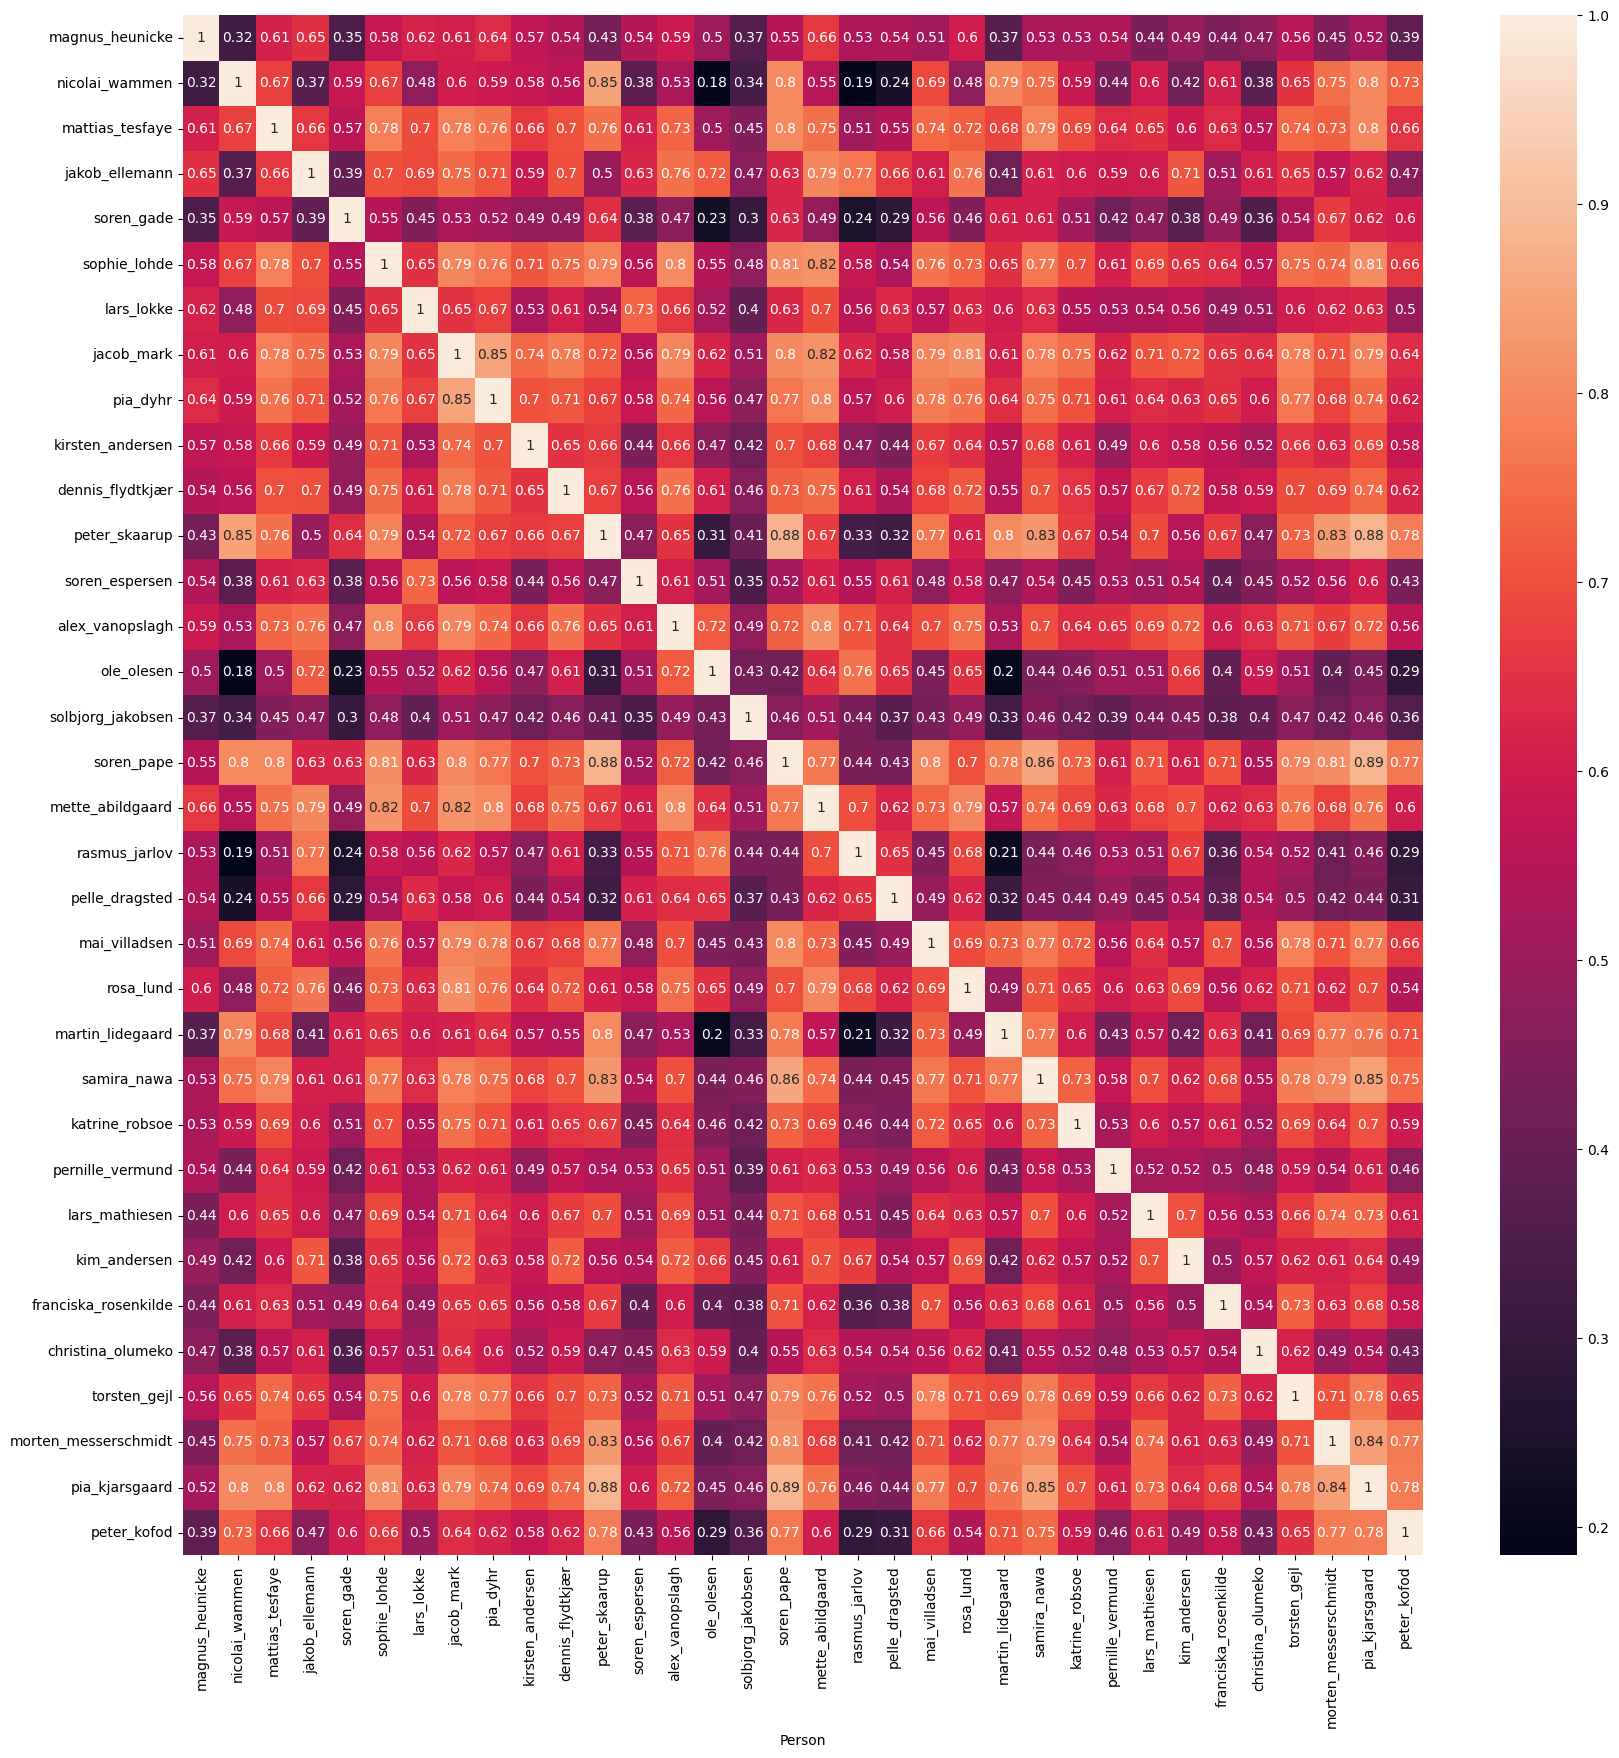

In [ ]:
import seaborn as sns
cos_sim = pd.DataFrame(cosine_similarity(X), columns=df_pol_new.Person, index=df_pol_new.Person)
cos_sim.index.name = None
cos_sim

fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(cos_sim, ax=ax, xticklabels=True, yticklabels=True, annot=True)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=30797f9c-952e-45b4-98d4-31c9ac73ae78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>